## Purpose:

1. Design a project using Recurrent Neural Networks, fundamental to predicting sequential events.
2. Compare performance of RNN architectures for stock price prediction, based on real historical data.
3. Use knowledge of RNN structure to design experimental test cases.
4. Report and interpret experimental results in a clear written format.


In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, Embedding, SimpleRNN
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
df = pd.read_csv("appledata.csv", index_col='Date', parse_dates=["Date"])

In [3]:
# display the data
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-11-16,148.79,149.05,149.84,147.31,63.92M,-0.83%
2022-11-15,150.04,152.21,153.59,148.56,89.59M,1.19%
2022-11-14,148.28,148.97,150.28,147.43,72.83M,-0.95%
2022-11-11,149.70,145.82,150.01,144.37,93.69M,1.93%
2022-11-10,146.87,141.24,146.87,139.50,118.85M,8.90%


In [4]:
# overview of the data
df.describe()

,Price,Open,High,Low
count,2989.000000,2989.000000,2989.000000,2989.000000
mean,53.975236,53.945477,54.547283,53.357615
std,47.089047,47.052861,47.665477,46.463138
min,11.260000,11.310000,11.350000,11.090000
25%,21.400000,21.370000,21.590000,21.110000
50%,32.160000,32.100000,32.370000,31.880000
75%,64.610000,64.260000,65.090000,63.840000
max,182.010000,182.630000,182.940000,179.120000


In [5]:
# checking for the missing data
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
# sorting the data by index.
df = df.sort_values(by='Date')

# considering Price attribute for training and testing.
train = df[:'2021'].iloc[:,0:1].values
test = df['2022':].iloc[:,0:1].values

In [7]:
# shape of the training and testing data.
print("Shape of training data: ", train.shape)
print("Shape of testing data: ", test.shape)

Shape of training data:  (2768, 1)
Shape of testing data:  (221, 1)


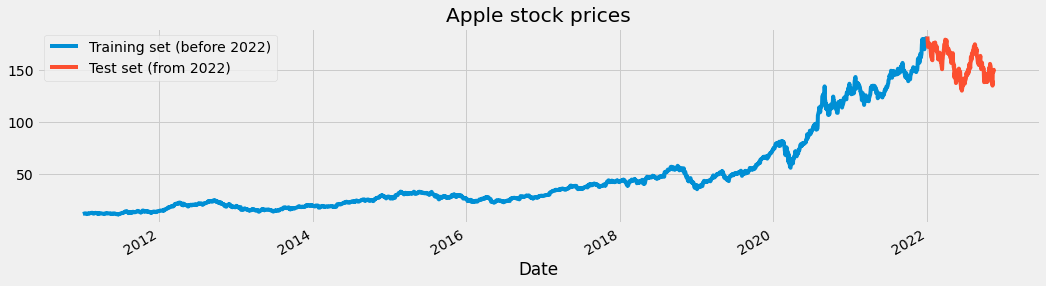

In [8]:
# visualize the data
df["Price"][:'2021'].plot(figsize=(16,4), legend=True)
df["Price"]["2022":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2022)", "Test set (from 2022)"])
plt.title("Apple stock prices")
plt.show()

In [9]:
# data scaling
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [10]:
# sliding window/ time stamp of 60-days
x_train = []
y_train = []

for i in range(60,2768):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# spilt the train data into training set and validation set
x_train = x_train[:-221]
y_train = y_train[:-221]
x_val = x_train[-221:]
y_val = y_train[-221:]

# reshape the inputs
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [12]:
# shape of features and target variable.
print("Shape of training data: ", x_train.shape)
print("Shape of training target: ", y_train.shape)
print("Shape of validation data: ", x_val.shape)
print("Shape of validation data: ", y_val.shape)

Shape of training data:  (2487, 60, 1)
Shape of training target:  (2487,)
Shape of validation data:  (221, 60, 1)
Shape of validation data:  (221,)


In [13]:
# function which plots AAPL stock prices: real and predicted both
def plot_preds(test, predicted):
    plt.plot(test, color="red", label="real AAPL stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("AAPL stock price prediction")
    plt.xlabel("time")
    plt.ylabel("AAPL stock price")
    plt.legend()
    plt.show()
    
# calculates root mean squared error
def rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is : {}.".format(rmse))

## Simple RNN Model

In [14]:
## simple RNN
rnn_model = Sequential()

# add first layer with dropout
rnn_model.add(SimpleRNN(units=50, return_sequences= True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2))
# add second layer with dropout
rnn_model.add(SimpleRNN(units=50, return_sequences= True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2))
# add third layer with dropout
rnn_model.add(SimpleRNN(units=50, return_sequences= True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2))
# add fourth layer with dropout
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2))
# the output layer
rnn_model.add(Dense(units=1))
# compiling the LSTM RNN network
rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
# fit to the training set
rnn_history = rnn_model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))

Epoch 1/15
78/78 [==============================] - 4s 27ms/step - loss: 0.3887 - val_loss: 0.0199
Epoch 2/15
78/78 [==============================] - 2s 23ms/step - loss: 0.1812 - val_loss: 0.0359
Epoch 3/15
78/78 [==============================] - 2s 23ms/step - loss: 0.0581 - val_loss: 0.0268
Epoch 4/15
78/78 [==============================] - 2s 23ms/step - loss: 0.0163 - val_loss: 0.0029
Epoch 5/15
78/78 [==============================] - 2s 23ms/step - loss: 0.0056 - val_loss: 9.1223e-04
Epoch 6/15
78/78 [==============================] - 2s 23ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 7/15
78/78 [==============================] - 2s 23ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 8/15
78/78 [==============================] - 2s 24ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 9/15
78/78 [==============================] - 2s 24ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/15
78/78 [==============================] - 2s 24ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch

In [15]:
# Convets test data into 60-days time stamp format
dataset_total = pd.concat((df['Price'][:'2021'], df['Price']['2022':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)
x_test = []
for i in range(60,281):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(2989,)
(281,)
(281, 1)
(281, 1)


7/7 [==============================] - 0s 6ms/step


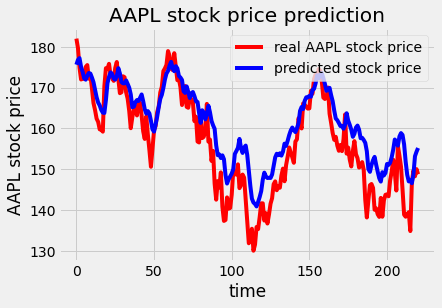

The root mean squared error is : 6.604682358199617.
R2 score:  0.7190629607907191


In [16]:
# simple RNN predictions
rnn_predicted = rnn_model.predict(x_test)
rnn_predicted = sc.inverse_transform(rnn_predicted)
plot_preds(test, rnn_predicted)
rmse(test, rnn_predicted)
print("R2 score: ", r2_score(test, rnn_predicted))

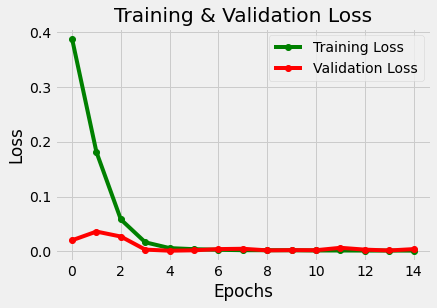

In [17]:
# Training and validation loss for simple RNN
epochs = [i for i in range(15)]
rnn_train_loss = rnn_history.history['loss']
rnn_val_loss = rnn_history.history['val_loss']
plt.plot(epochs , rnn_train_loss , 'g-o' , label = 'Training Loss')
plt.plot(epochs , rnn_val_loss , 'r-o' , label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## LSTM Model

Epoch 1/15
78/78 [==============================] - 5s 34ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 2/15
78/78 [==============================] - 2s 26ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 3/15
78/78 [==============================] - 2s 26ms/step - loss: 8.9586e-04 - val_loss: 9.4463e-04
Epoch 4/15
78/78 [==============================] - 2s 25ms/step - loss: 8.2900e-04 - val_loss: 6.7272e-04
Epoch 5/15
78/78 [==============================] - 2s 26ms/step - loss: 7.7658e-04 - val_loss: 0.0041
Epoch 6/15
78/78 [==============================] - 2s 26ms/step - loss: 6.7353e-04 - val_loss: 0.0056
Epoch 7/15
78/78 [==============================] - 2s 26ms/step - loss: 6.2155e-04 - val_loss: 0.0013
Epoch 8/15
78/78 [==============================] - 2s 26ms/step - loss: 5.7293e-04 - val_loss: 0.0013
Epoch 9/15
78/78 [==============================] - 2s 26ms/step - loss: 5.4556e-04 - val_loss: 8.0470e-04
Epoch 10/15
78/78 [==============================] - 2s 26ms/step - l

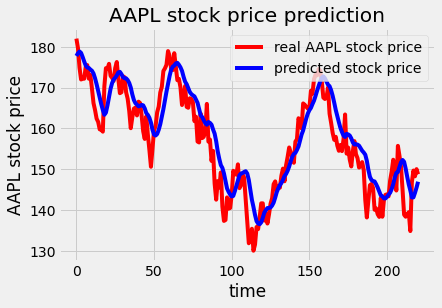

The root mean squared error is : 5.581754214166198.
R2 score:  0.7993465887354593


In [18]:
# LSTM architecture
lstm_model = Sequential()
# add first layer with dropout
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))
# add second layer with dropout
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
# the output layer
lstm_model.add(Dense(units=1))
# compiling the LSTM RNN network
lstm_model.compile(optimizer='rmsprop', loss='mean_squared_error')
# fit to the training set
lstm_history = lstm_model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))
# predicting the stock prices for test set
lstm_predicted = lstm_model.predict(x_test)
lstm_predicted = sc.inverse_transform(lstm_predicted)
# visualizing the results: predicted vs test
plot_preds(test, lstm_predicted)
rmse(test, lstm_predicted)
print("R2 score: ", r2_score(test, lstm_predicted))

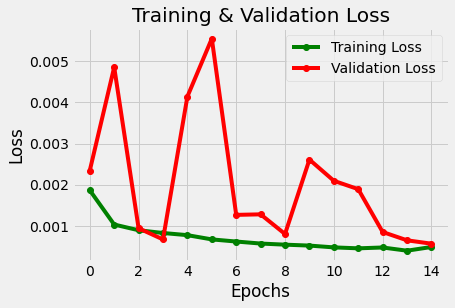

In [19]:
# Training and validation loss for LSTM
epochs = [i for i in range(15)]
lstm_train_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']
plt.plot(epochs , lstm_train_loss , 'g-o' , label = 'Training Loss')
plt.plot(epochs , lstm_val_loss , 'r-o' , label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## BLSTM Model

Epoch 1/15
78/78 [==============================] - 10s 54ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 2/15
78/78 [==============================] - 3s 37ms/step - loss: 0.0011 - val_loss: 9.7618e-04
Epoch 3/15
78/78 [==============================] - 3s 37ms/step - loss: 8.2800e-04 - val_loss: 0.0013
Epoch 4/15
78/78 [==============================] - 3s 37ms/step - loss: 7.3062e-04 - val_loss: 0.0061
Epoch 5/15
78/78 [==============================] - 3s 38ms/step - loss: 6.4097e-04 - val_loss: 0.0031
Epoch 6/15
78/78 [==============================] - 3s 37ms/step - loss: 5.9083e-04 - val_loss: 0.0038
Epoch 7/15
78/78 [==============================] - 3s 38ms/step - loss: 5.2620e-04 - val_loss: 0.0017
Epoch 8/15
78/78 [==============================] - 3s 37ms/step - loss: 5.6440e-04 - val_loss: 0.0036
Epoch 9/15
78/78 [==============================] - 3s 37ms/step - loss: 4.5040e-04 - val_loss: 0.0014
Epoch 10/15
78/78 [==============================] - 3s 38ms/step - loss: 5.

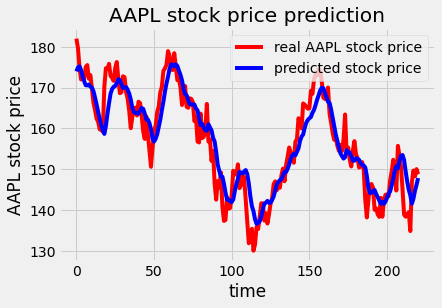

The root mean squared error is : 4.772147486056276.
R2 score:  0.8533328529351308


In [20]:
# Bidirectional LSTM
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
# LSTM architecture
blstm_model = Sequential()
# add first layer with dropout
blstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))))
blstm_model.add(Dropout(0.2))
# add second layer with dropout
blstm_model.add(Bidirectional(LSTM(units=50)))
blstm_model.add(Dropout(0.2))
# the output layer
blstm_model.add(Dense(units=1))
# compiling the LSTM RNN network
blstm_model.compile(optimizer='rmsprop', loss='mean_squared_error')
# fit to the training set
blstm_history = blstm_model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))
blstm_predicted = blstm_model.predict(x_test)
blstm_predicted = sc.inverse_transform(blstm_predicted)
plot_preds(test, blstm_predicted)
rmse(test, blstm_predicted)
print("R2 score: ", r2_score(test, blstm_predicted))

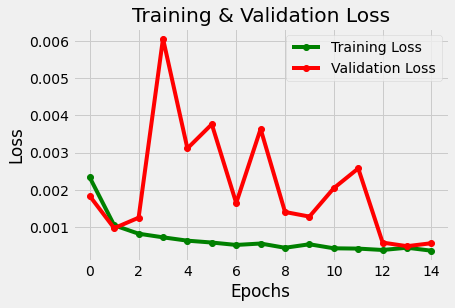

In [21]:
# Training and validation loss for BLSTM
epochs = [i for i in range(15)]
blstm_train_loss = blstm_history.history['loss']
blstm_val_loss = blstm_history.history['val_loss']
plt.plot(epochs , blstm_train_loss , 'g-o' , label = 'Training Loss')
plt.plot(epochs , blstm_val_loss , 'r-o' , label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## GRU Model

Epoch 1/15
78/78 [==============================] - 5s 33ms/step - loss: 0.0173 - val_loss: 0.0105
Epoch 2/15
78/78 [==============================] - 2s 25ms/step - loss: 9.6289e-04 - val_loss: 6.4013e-04
Epoch 3/15
78/78 [==============================] - 2s 27ms/step - loss: 7.3361e-04 - val_loss: 6.7660e-04
Epoch 4/15
78/78 [==============================] - 2s 28ms/step - loss: 6.6581e-04 - val_loss: 5.4294e-04
Epoch 5/15
78/78 [==============================] - 2s 28ms/step - loss: 6.3386e-04 - val_loss: 9.7082e-04
Epoch 6/15
78/78 [==============================] - 2s 28ms/step - loss: 5.7230e-04 - val_loss: 5.9855e-04
Epoch 7/15
78/78 [==============================] - 2s 27ms/step - loss: 5.5765e-04 - val_loss: 6.2613e-04
Epoch 8/15
78/78 [==============================] - 2s 28ms/step - loss: 5.7127e-04 - val_loss: 6.3475e-04
Epoch 9/15
78/78 [==============================] - 2s 26ms/step - loss: 5.4473e-04 - val_loss: 5.0959e-04
Epoch 10/15
78/78 [==========================

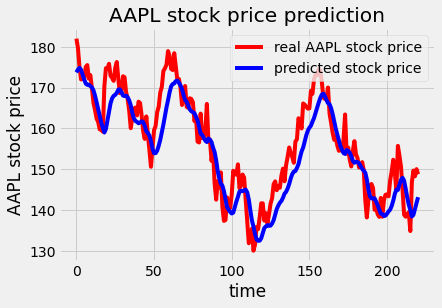

The root mean squared error is : 5.655104886319837.
R2 score:  0.7940383045812432


In [22]:
# The GRU architecture
gru_model = Sequential()
# First GRU layer with Dropout regularisation
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, activation='tanh'))
gru_model.add(Dropout(0.2))
# The output layer
gru_model.add(Dense(units=1))
# compiling the model
gru_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')
# fitting the model
gru_history = gru_model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))
# predicting the stock prices for test set and visualization
predicted_with_gru = gru_model.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)
plot_preds(test, predicted_with_gru)
rmse(test, predicted_with_gru)
print("R2 score: ", r2_score(test, predicted_with_gru))

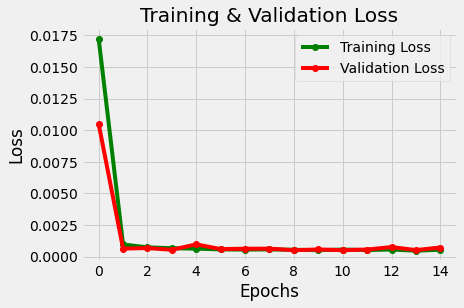

In [23]:
# Training and validation loss for GRU
epochs = [i for i in range(15)]
gru_train_loss = gru_history.history['loss']
gru_val_loss = gru_history.history['val_loss']
plt.plot(epochs , gru_train_loss , 'g-o' , label = 'Training Loss')
plt.plot(epochs , gru_val_loss , 'r-o' , label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()